# Project:Customer Churn in a Telecom Industry(Clustering)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Clustering Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is the customer churn dataset from the telecom industry which includes customer data, usage of long-distance, data usage, monthly revenue, type of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, include several Excel files which have been combined and are available in the course materials. 

>This was first used in the KNN model lesson, here using the subset of customers who have phone accounts. Since the data include a mix of numeric, categorical, and ordinal variables

>**Objective**: Although the task for the original Data set is to predict Customer churn, here I'll try to segment customers using clustering algorithms. 

Questions for EDA:
- What variables are contributing to customer churn?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
path = 'churndata_processed.csv'
df_churn = pd.read_csv(path)
df_churn.head().T

,0,1,2,3,4
months,0.000000,0.000000,0.250000,0.250000,0.500000
multiple,0.000000,1.000000,1.000000,0.000000,1.000000
gb_mon,0.094118,0.200000,0.611765,0.141176,0.164706
security,0.000000,0.000000,0.000000,0.000000,0.000000
backup,0.000000,1.000000,0.000000,1.000000,0.000000
protection,1.000000,0.000000,0.000000,1.000000,0.000000
support,0.000000,0.000000,0.000000,0.000000,0.000000
unlimited,0.000000,1.000000,1.000000,1.000000,1.000000
contract,0.000000,0.000000,0.000000,0.000000,0.000000
paperless,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#checking for info, data types, null values 
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  internet_type_DSL          7043 non-null   int64

In [4]:
#how many data types 
df_churn.dtypes.value_counts()

int64      18
float64     5
dtype: int64

<a id='wrangling'></a>
## Data Wrangling


### General Properties

| Feature name  | Desc        |
|:------------- |:-------------| 
|months | Numerical: Number of months the customer has stayed with the company|
|multiple |Numerical: the customer has multiple lines services or not |
|gbmon |Numerical: giga bytes per month|
|security |Numerical Whether the customer has online security or not|
|backup |Numerical: Whether the customer has online backup or not |
|protection |Numerical Whether the customer has device protection or not|
|Support | Numerical: Whether the customer has tech support or not |
|unlimited|Numerical unlimited subscription or not|
|Contract |Numerical: The contract term of the customer (Month-to-month, One year, Two year)|
|Paperless | Numerical:Whether the customer has paperless billing or not|
|monthly |Numerical: The amount charged to the customer monthly|
|satisfaction |Numerical: a scale of 5 values between 0 and 1|
|churn_value | Numerical:Whether the customer churned or not|
|internet_type_DSL|Numerical: Whether the customer has internet_type_DSL service or not |
|internet_type_Fiber Optic|Numerical: Whether the customer has internet_type_Fiber Optic service or not|
|internet_type_None|Numerical: Whether the customer has no internet service or not|
|payment_Credit Card| Numerical: Payment type credit card or not|
|payment_Mailed Check|Numerical: Payment type mailed check or not|
|offer_Offer A, b, c, d, e| Numerical: different offers by company|

### The structure of your dataset?

> The data set contains 7043 observation , 23 columns(features) all numerical, no null values or  duplicates.



### Data Cleaning (Replace this with more specific notes!)

- The Categorical features (offer, multiple, internet_type, security, back-up, protection , support, unlimited, contract, paperless, payment)  will be encoded using Pandas get_dummies into binary variables
- Months variable has been transformed into ordinal variable and its values has been cut into bins using pandas_cut function
- Customer ID, 'phone', 'total_revenue', 'cltv', 'churn_score' will be dropped
- Scaling the data before fitting in the models

In [94]:
df_churn.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_Credit Card,payment_Mailed Check,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.234559,0.430924,0.216669,0.390317,0.054664,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.423753,0.495241,0.412004,0.487856,0.227340,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df_unique = df_churn.nunique().to_frame()
df_unique

,0
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3
paperless,2


In [102]:
binary_variables = list(df_unique[df_unique[0] == 2].index)

In [104]:
len(binary_variables)

18

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Replace this header name!)

## Univariate Exploration


In [42]:
import warnings
warnings.simplefilter('ignore')

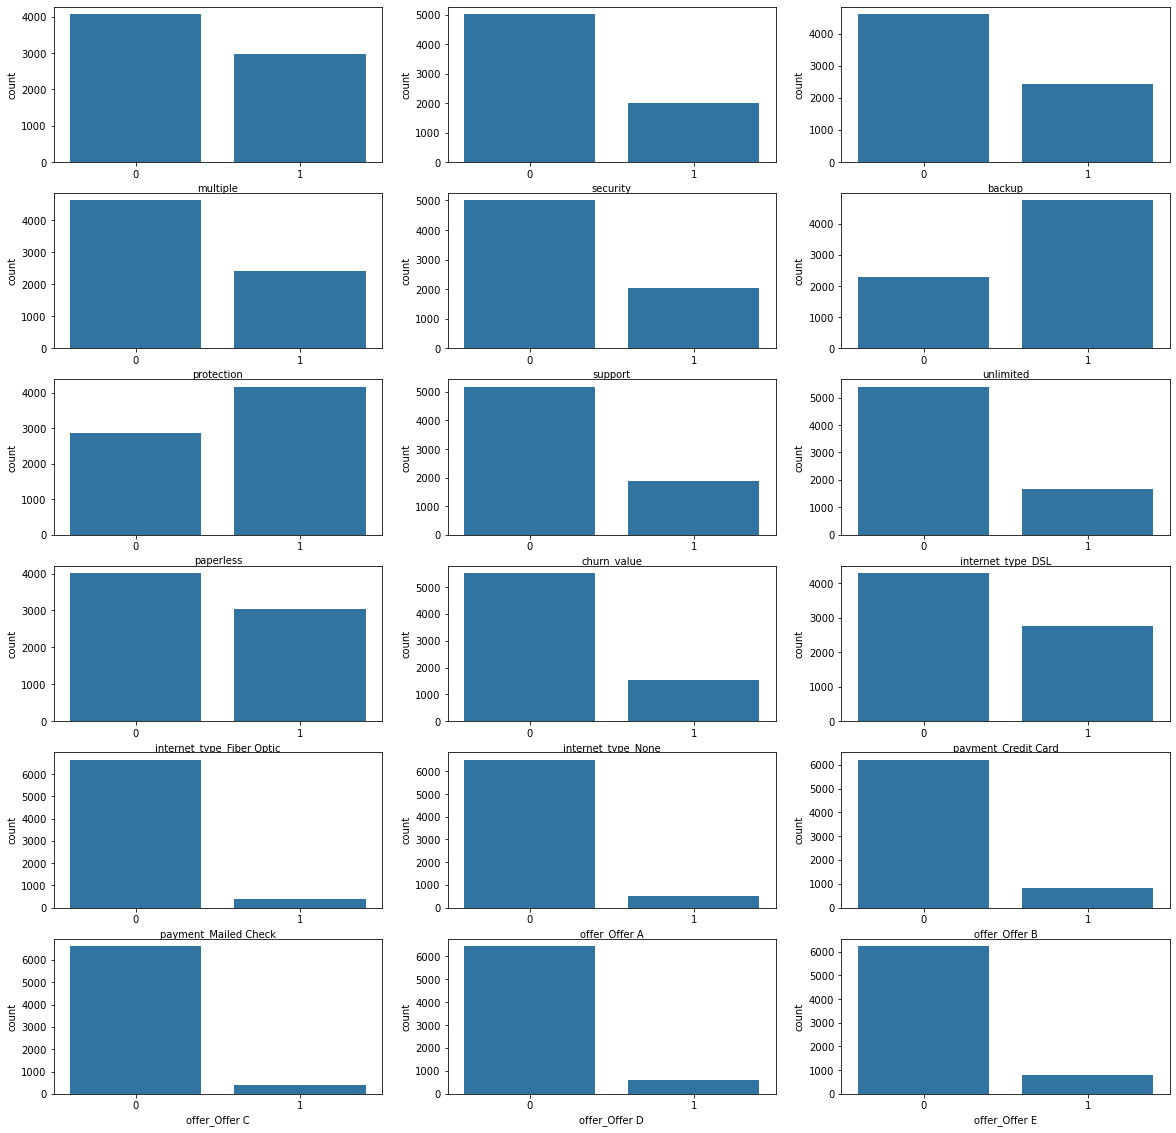

In [107]:
#plotting all binary variables
cols = binary_variables
color = sb.color_palette()[0]
#  Categorical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,20))
for i in cols:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sb.countplot(df_churn[i], color=color)
    c = c + 1
plt.show()


In [112]:
df_churn.churn_value.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

> Churn rate is ~27 % of the overall data set

> Most customers are have unlimited services, paperless Billing 

> Fiber optic internet type is more common than the ordinary internet type

> A significant count of customers have multiple lines services

> Security, support and protection are less used by customers or maybe not very popular

> Credit card payments are more common than the ordinary mailed check

> Almost all offers are not used by most customers

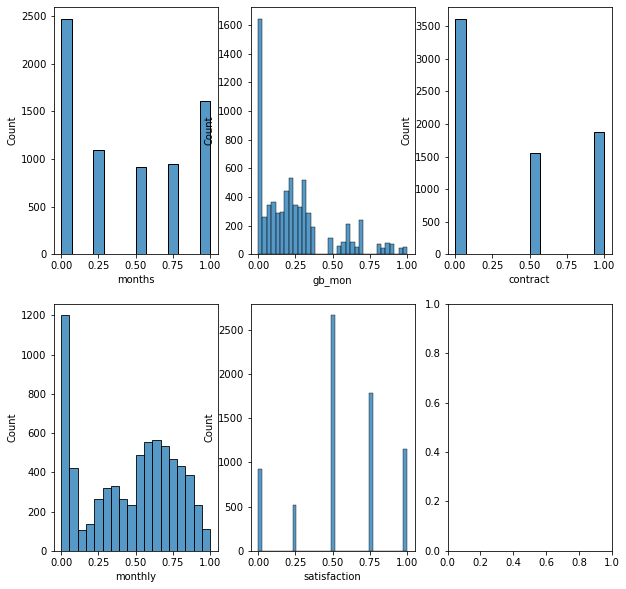

In [125]:
#plotting other numerical variables distribution 
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sb.histplot(data=df_churn, x="months", ax=axs[0, 0])
sb.histplot(data=df_churn, x="gb_mon",  color=color, ax=axs[0, 1])
sb.histplot(data=df_churn, x="contract",color=color, ax=axs[0, 2])
sb.histplot(data=df_churn, x="monthly", color=color, ax=axs[1, 0])
sb.histplot(data=df_churn, x="satisfaction", color=color, ax=axs[1, 1])

plt.show()

In [114]:
df_churn.satisfaction.value_counts(normalize=True, bins=3)

(0.667, 1.0]       0.417152
(0.333, 0.667]     0.378390
(-0.002, 0.333]    0.204458
Name: satisfaction, dtype: float64

> Satisfaction level is of higher values among most customers almost 70%

> Most contracts are month to month about 50 %

> Monthly charges of 20 or less than 40 are the most used charges

## Bivariate Exploration & Multivariate Exploration


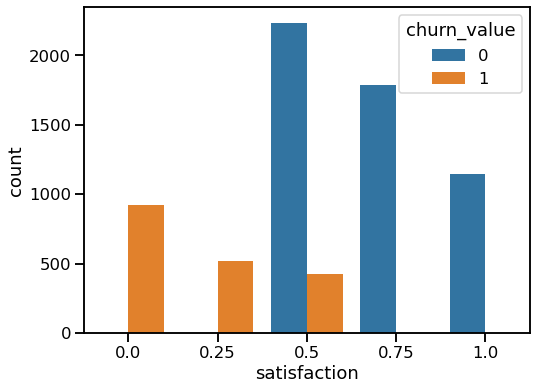

In [138]:
plt.figure(figsize=(8,6))
sb.countplot(data=df_churn, x='satisfaction' , hue='churn_value');

> Churned customers have low satisfaction level of less than average

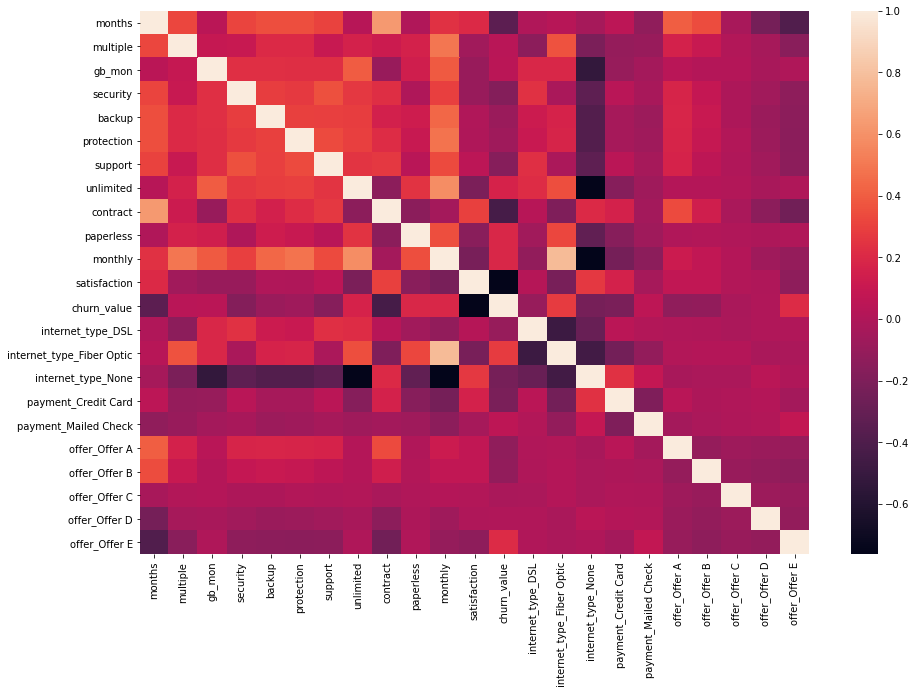

In [55]:
fig, ax = plt.subplots(figsize=(15,10)) 
sb.heatmap(df_clean.corr());

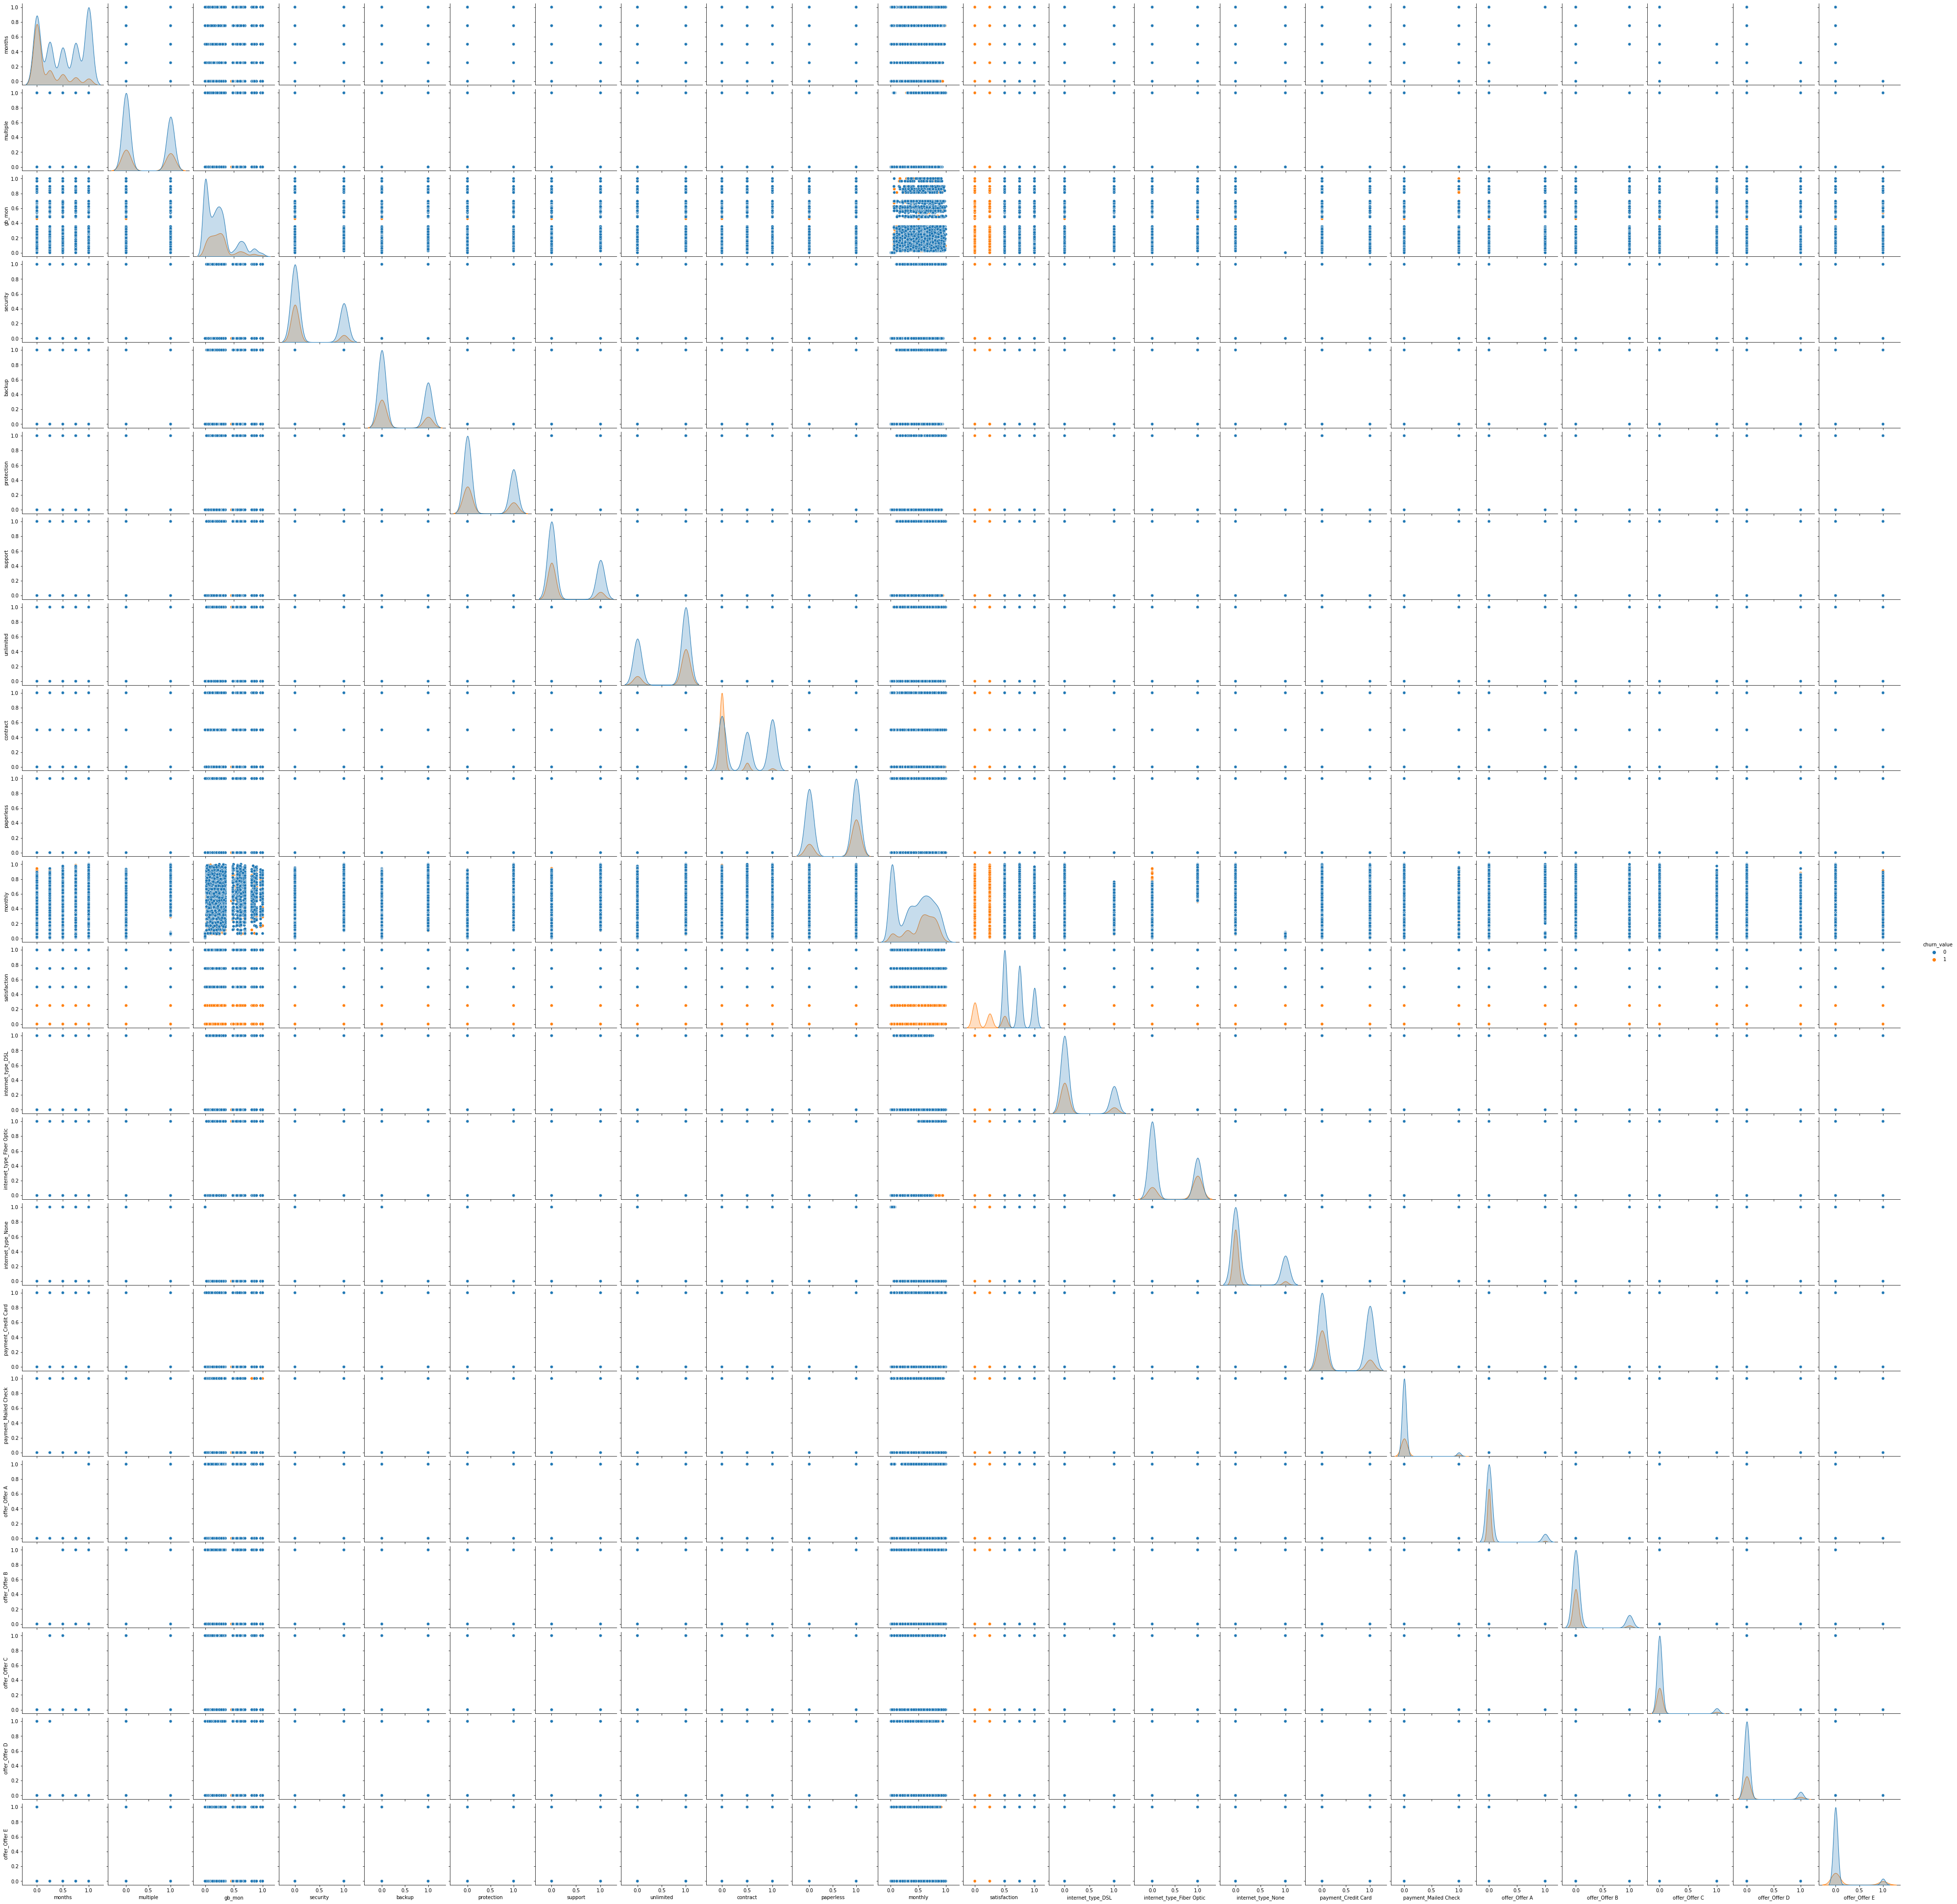

In [57]:
sb.pairplot(df_clean, hue='churn_value');

In [17]:
# The correlation matrix
corr_mat = df_churn.corr()

# Strip out the diagonal values for the next step
for x in range(len(df_churn.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_Credit Card,payment_Mailed Check,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
months,0.000000,0.321235,0.046863,0.315527,0.349682,0.350511,0.310377,0.031219,0.629463,0.003924,...,0.007804,0.029646,-0.037735,0.055491,-0.123784,0.401638,0.340577,-0.026761,-0.234338,-0.391121
multiple,0.321235,0.000000,0.091679,0.098108,0.202237,0.201137,0.100571,0.159669,0.120475,0.163530,...,-0.141726,0.359797,-0.210564,-0.102332,-0.091576,0.163428,0.101441,0.014575,-0.039021,-0.154137
gb_mon,0.046863,0.091679,0.000000,0.234738,0.229254,0.225877,0.223924,0.395209,-0.093588,0.142999,...,0.189763,0.191512,-0.528450,-0.096806,-0.043116,0.038480,0.018397,0.021679,-0.030202,-0.002380
security,0.315527,0.098108,0.234738,0.000000,0.283832,0.275438,0.354931,0.265037,0.228371,-0.003636,...,0.240403,-0.024751,-0.333403,0.041805,-0.029513,0.177625,0.089664,-0.009290,-0.057919,-0.132006
backup,0.349682,0.202237,0.229254,0.283832,0.000000,0.303546,0.294233,0.283855,0.159355,0.126735,...,0.120729,0.167258,-0.381593,-0.035564,-0.081179,0.181239,0.105777,-0.007771,-0.081859,-0.136721
protection,0.350511,0.201137,0.225877,0.275438,0.303546,0.000000,0.333313,0.296619,0.217698,0.103797,...,0.110683,0.175230,-0.380754,-0.038203,-0.062323,0.177382,0.091731,0.010519,-0.074860,-0.147336
support,0.310377,0.100571,0.223924,0.354931,0.294233,0.333313,0.000000,0.251496,0.269251,0.037880,...,0.229289,-0.015673,-0.336298,0.042449,-0.036790,0.169983,0.058263,0.004729,-0.057860,-0.143183
unlimited,0.031219,0.159669,0.395209,0.265037,0.283855,0.296619,0.251496,0.000000,-0.141168,0.245215,...,0.215137,0.349348,-0.755734,-0.170130,-0.065785,0.020459,0.016824,0.010811,-0.032038,0.000625
contract,0.629463,0.120475,-0.093588,0.228371,0.159355,0.217698,0.269251,-0.141168,0.000000,-0.149583,...,0.030445,-0.193237,0.202376,0.164698,-0.051972,0.333117,0.144255,-0.022912,-0.137305,-0.253319
paperless,0.003924,0.163530,0.142999,-0.003636,0.126735,0.103797,0.037880,0.245215,-0.149583,0.000000,...,-0.054104,0.320088,-0.321013,-0.159922,-0.061013,0.002261,0.014393,0.006416,-0.011901,0.006596


In [6]:
corr_mat.abs().idxmax()

months                                        contract
multiple                                       monthly
gb_mon                              internet_type_None
security                                       support
backup                                         monthly
protection                                     monthly
support                                       security
unlimited                           internet_type_None
contract                                        months
paperless                                      monthly
monthly                      internet_type_Fiber Optic
satisfaction                               churn_value
churn_value                               satisfaction
internet_type_DSL            internet_type_Fiber Optic
internet_type_Fiber Optic                      monthly
internet_type_None                             monthly
payment_Credit Card          internet_type_Fiber Optic
payment_Mailed Check               payment_Credit Card
offer_Offe

In [15]:
corr_mat.churn_value.sort_values(ascending=False)

internet_type_Fiber Optic    0.279623
offer_Offer E                0.214648
monthly                      0.193356
paperless                    0.191825
unlimited                    0.166545
payment_Mailed Check         0.056348
gb_mon                       0.048868
multiple                     0.040102
offer_Offer D                0.001435
churn_value                  0.000000
offer_Offer C               -0.020660
protection                  -0.066160
backup                      -0.082255
internet_type_DSL           -0.099716
offer_Offer B               -0.117723
offer_Offer A               -0.126654
support                     -0.164674
security                    -0.171226
payment_Credit Card         -0.218528
internet_type_None          -0.227890
months                      -0.337205
contract                    -0.435398
satisfaction                -0.754649
Name: churn_value, dtype: float64

> Satisfaction has a high negative correlation with churn value, contract and months variables are highly correlated 

<a id='ml'></a>
## Clustering Models

In [18]:
#preparing data to be trained in the clustering models 
X = df_churn.drop('churn_value', axis=1)

In [19]:
from sklearn.cluster import KMeans
#fitting K-Means models with cluster values ranging from 1 to 20.
km_list = list()
for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(X)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

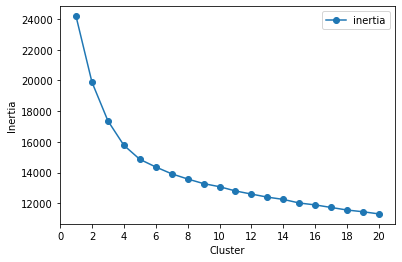

In [20]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [144]:
km = KMeans(n_clusters=4, random_state=42)
km = km.fit(X)

In [147]:
df_churn['KMeans'] = km.predict(X)
df_churn.groupby(['KMeans']).size().to_frame()

,0
KMeans,
0,2239
1,1618
2,1551
3,1635


In [140]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(X)
df_churn['agglom'] = ag.fit_predict(X)

In [141]:
df_churn.groupby(['agglom']).size().to_frame()

,0
agglom,
0,2373
1,1530
2,1637
3,1503


In [75]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=90)
db.fit(X)


df_churn['DBScan'] = db.fit_predict(X)

In [148]:
df_churn.groupby(['DBScan']).size().to_frame()

,0
DBScan,
-1,6837
0,116
1,90


In [77]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, random_state=42).fit(X)

In [79]:
df_churn['GMM'] = gm.fit_predict(X)

In [80]:
df_churn.groupby(['GMM']).size().to_frame()

,0
GMM,
0,731
1,1526
2,2362
3,2424


#### Dimensionality Reduction

In [153]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 19):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.229999
2,PCA(n_components=2),0.376237
3,PCA(n_components=3),0.479358
4,PCA(n_components=4),0.539995
5,PCA(n_components=5),0.595613
6,PCA(n_components=6),0.64414
7,PCA(n_components=7),0.690368
8,PCA(n_components=8),0.733026
9,PCA(n_components=9),0.771583


> so using 18 columns of the original data can explain ~97% of the variance

In [154]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,backup,contract,gb_mon,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,monthly,months,multiple,offer_Offer A,...,offer_Offer D,offer_Offer E,paperless,payment_Credit Card,payment_Mailed Check,protection,satisfaction,security,support,unlimited
n,,,,,,,,,,,,,,,,,,,,,
1,0.082489,0.011018,0.032526,0.010739,0.083972,0.098853,0.079546,0.046837,0.072117,0.015933,...,0.008953,0.016341,0.059070,0.036030,0.008368,0.084106,0.016928,0.061161,0.064251,0.097089
2,0.064062,0.061614,0.018000,0.035550,0.094073,0.064599,0.052174,0.068106,0.039678,0.023247,...,0.010619,0.025738,0.064407,0.055536,0.006620,0.067129,0.028513,0.067042,0.070436,0.064123
3,0.044132,0.066814,0.022377,0.069549,0.093223,0.069204,0.041969,0.073679,0.067345,0.024132,...,0.010987,0.029841,0.045987,0.040707,0.007786,0.047550,0.027852,0.061396,0.061019,0.072685
4,0.038241,0.064202,0.020127,0.066653,0.089538,0.060960,0.039065,0.070118,0.059005,0.021885,...,0.012413,0.027192,0.052130,0.102498,0.017028,0.040314,0.023705,0.051152,0.052135,0.066935
5,0.036524,0.060604,0.019171,0.066586,0.090678,0.056456,0.039238,0.066320,0.053067,0.020287,...,0.012077,0.025749,0.099769,0.089653,0.014549,0.038938,0.024071,0.050901,0.044394,0.065392
6,0.033577,0.058064,0.017202,0.074716,0.089155,0.050836,0.035573,0.058243,0.085464,0.017736,...,0.013013,0.022737,0.087956,0.081673,0.013444,0.057214,0.024422,0.050804,0.045660,0.060328
7,0.070186,0.055026,0.015426,0.070538,0.081988,0.046011,0.032219,0.053638,0.085851,0.015957,...,0.013209,0.020774,0.083398,0.074003,0.012447,0.071864,0.022751,0.045510,0.049341,0.056316
8,0.072862,0.052876,0.013576,0.072540,0.078168,0.041342,0.029083,0.049351,0.083498,0.015332,...,0.012700,0.019074,0.078152,0.067470,0.011906,0.083469,0.025988,0.067791,0.052180,0.050509
9,0.067691,0.047863,0.012395,0.067584,0.071841,0.037422,0.027701,0.049462,0.079384,0.014247,...,0.014081,0.018113,0.072633,0.062975,0.011454,0.086493,0.027750,0.076547,0.077562,0.048073


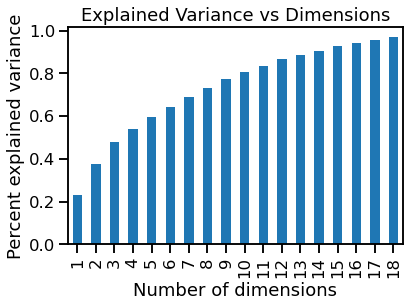

In [155]:
sb.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

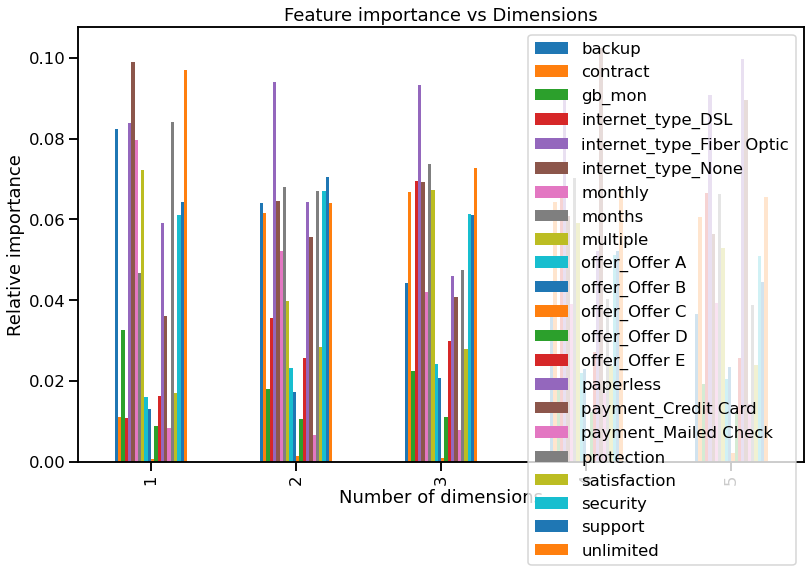

In [152]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

<a id='conclusions'></a>
## Conclusions

> EDA Findings:
- Most customers have unlimited services, paperless Billing. 
- Fiber optic internet type is more common than the ordinary internet type. 
- A significant count of customers have multiple lines services.
- Security, support and protection are less used by customers or maybe not very popular.
- Credit card payments are more common than the ordinary mailed check.
- Almost all offers are not used by most customers.
- Satisfaction level is of higher values among most customers almost 70%
- Most contracts are month to month about 50 %
- Monthly charges of 20 or less than 40 are the most used charges.
- Satisfaction has a high negative correlation with churn value, contract and months variables are highly correlated.


>**Best Model** in terms of business objective for this segmentation was K-Means model after trying n- clusters in a range then picking the best cluster through the Elbow method .

-	Main Driver for the model is to cluster or segment customers using unsupervised machine learning models.
-	Models k-means and Agglomerative clustering did fairly the same but the DBscan was not so efficient in the clustering purpose of this data set.
-	K-means was simple and fast to implement on a large data set.


#### Limitations :
-	The problem with k-means is that we must define the number of clusters, also it is more sensitive to outliers.

-	For business purpose another technique or approach to be used  is called RFM Analysis, RFM stands for “recency, frequency, monetary,” representing some of the most important attributes of a customer from a company’s point of view, to conduct this analysis, you would collect the relevant data on each customer and sort customers into groups based on similar values for each of the RFM variables.

-	So that would suggest collecting more data, and revisiting the model for amore robust resulgts , here’s an article by [Tern Poh Lim's] that outlines how you can do this same analysis (RFM )using k-means to sort customers into clusters. Even better, he points out that you can use k-means iteratively to figure out the best number of clusters to use, taking a lot of the guesswork out of the clustering process.
Source link by [JR Kreiger (towards data science)]
